[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-10.  20. -10.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. -10.  20. -10.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.  20. -10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -10.  20. -10.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -10.  20. -10.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -10.  20. -10.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. -10.  20. -10.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -10.  20. -10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. -10.  20. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


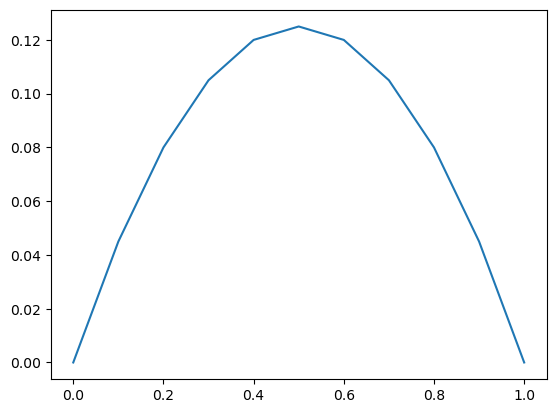

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def solve_dirichlet(alpha, N):
    xs = [i/N for i in range(N+1)]
    
    def p(x):
        if x < 1/2:
            return 1 # fix me
        else:
            return alpha # fix me
    
    def compute_A(i,j):
        h = 1 / N
        if i == j-1:
            midpoint = (xs[j-1] + xs[j])/2
            return -p(midpoint) / h # fix me
        elif i == j+1:
            midpoint = (xs[j] + xs[j+1])/2
            return -p(midpoint) / h # fix me
        elif i == j:
            left_midpoint = (xs[j-1] + xs[j])/2
            right_midpoint = (xs[j] + xs[j+1])/2
            return (p(left_midpoint) + p(right_midpoint)) / h # fix me
        else:
            return 0
    
    def compute_F(i):
        h = 1 / N
        return h  # fix me
    
    A = np.zeros((N+1,N+1))
    F = np.zeros(N+1)
    
    for i in range(1,N):
        F[i] = compute_F(i)
        for j in [i-1,i,i+1]:
            A[i,j] = compute_A(i,j)
    print(A)
    # dirichlet boundary conditions
    A[0,0] = 1 # fix me
    F[0] = 0
    A[-1,-1] = 1 # fix me
    F[-1] = 0
    
    return xs, np.linalg.solve(A,F)

def test_dirichlet():
    alpha = 1
    N = 10
    
    xs, us = solve_dirichlet(alpha,N)
    
    plt.plot(xs,us)
    
test_dirichlet()

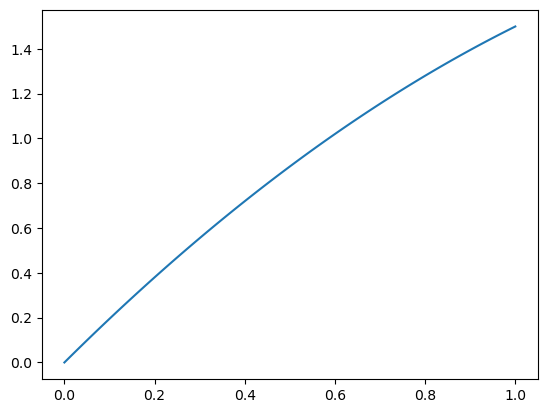

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_mixed(alpha, N):
    xs = [i/N for i in range(N+1)]
    
    def p(x):
        if x < 1/2:
            return 1
        else:
            return alpha
    
    def compute_A(i,j):
        if i < N:
            if i == j-1:
                midpoint = (xs[j-1] + xs[j])/2
                return -N*p(midpoint)
            elif i == j+1:
                midpoint = (xs[j] + xs[j+1])/2
                return -N*p(midpoint)
            elif i == j:
                left_midpoint = (xs[j-1] + xs[j])/2
                right_midpoint = (xs[j] + xs[j+1])/2
                return N*p(left_midpoint) + N*p(right_midpoint)
            else:
                return 0
        else:
            if j == N-1:
                midpoint = (xs[N-1] + xs[N])/2
                return -N*p(midpoint)
            else:
                midpoint = (xs[N-1] + xs[N])/2
                return N*p(midpoint)
    
    def compute_F(i):
        if i < N:
            return 1/N
        else:
            return 1/2/N + p(1)
    
    A = np.zeros((N+1,N+1))
    F = np.zeros(N+1)
    
    for i in range(1,N):
        F[i] = compute_F(i)
        for j in [i-1,i,i+1]:
            A[i,j] = compute_A(i,j)
    
    # dirichlet boundary condition
    A[0,0] = 1
    F[0] = 0
    
    # neumann boundary condition
    for j in [N-1,N]:
        A[N,j] = compute_A(N,j)
    F[-1] = compute_F(N)
    
    return xs, np.linalg.solve(A,F)

def test_mixed():
    alpha = 1
    N = 100
    
    xs, us = solve_mixed(alpha,N)
    
    plt.plot(xs,us)
    
test_mixed()